<a href="https://colab.research.google.com/github/Elizav555/Data_Mining/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import OPTICS
from scipy.spatial.distance import pdist
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch

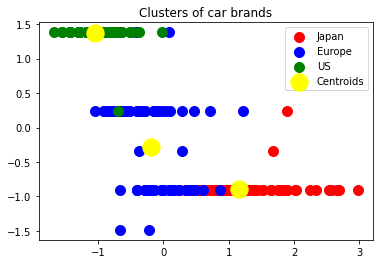

In [43]:
dataset = pd.read_csv('cars.csv')
dataset[' cubicinches'] = pd.to_numeric(dataset[' cubicinches'],errors="coerce")
dataset[' weightlbs'] = pd.to_numeric(dataset[' weightlbs'],errors="coerce")
dataset = dataset.dropna()
dataset_numeric = dataset.drop([' brand'], axis=1) #leave only numeric data
#Normalize data
dataset_values = pd.DataFrame(dataset_numeric).values
norm_dataset = (dataset_values - dataset_values.mean(axis=0)) / dataset_values.std(axis=0)
# Using the elbow method to find  the optimal number of clusters
from sklearn.cluster import KMeans
# Applying k-means to the cars dataset
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0) 
y_kmeans = kmeans.fit_predict(norm_dataset)

norm_dataset = np.asmatrix(norm_dataset)
X = np.array(norm_dataset)
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1],s=100,c='red',label='Japan')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1],s=100,c='blue',label='Europe')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2,1],s=100,c='green',label='US')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters of car brands')
plt.legend()
plt.show()

In [44]:
dataset.insert(0,"Cluster",y_kmeans)
dataset.head(10)

,Cluster,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,2,14.0,8,350.0,165,4209.0,12,1972,US.
1,0,31.9,4,89.0,71,1925.0,14,1980,Europe.
2,2,17.0,8,302.0,140,3449.0,11,1971,US.
3,2,15.0,8,400.0,150,3761.0,10,1971,US.
4,0,30.5,4,98.0,63,2051.0,17,1978,US.
5,2,23.0,8,350.0,125,3900.0,17,1980,US.
6,2,13.0,8,351.0,158,4363.0,13,1974,US.
7,2,14.0,8,440.0,215,4312.0,9,1971,US.
8,1,25.4,5,183.0,77,3530.0,20,1980,Europe.
9,0,37.7,4,89.0,62,2050.0,17,1982,Japan.


In [45]:
dictionary = {' Europe.': 2, ' US.': 1, ' Japan.':0}
dataset[' brand']=dataset[' brand'].map(dictionary)
dataset.head(20)
i=0
for index,row in dataset.iterrows():
  if row[' brand']!=row['Cluster']:
    i+=1
print(i)
print(dataset.shape[0])
print("Percent of similarity:", i/dataset.shape[0]*100 ,"%")

166
256
Percent of similarity: 64.84375 %


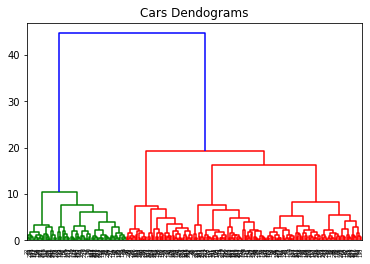

In [46]:
plt.title("Cars Dendograms")
dend = shc.dendrogram(shc.linkage(norm_dataset, method='ward'))
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


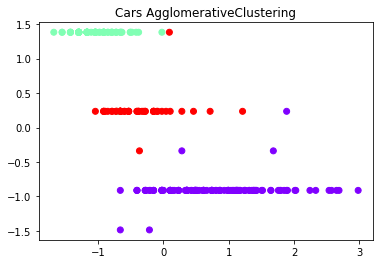

In [48]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(norm_dataset)
plt.title("Cars AgglomerativeClustering")
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow')
plt.show()

In [49]:
dataset.insert(0,"Cluster2",cluster.labels_)
dataset.head(10)

,Cluster2,Cluster,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,1,2,14.0,8,350.0,165,4209.0,12,1972,1
1,0,0,31.9,4,89.0,71,1925.0,14,1980,2
2,1,2,17.0,8,302.0,140,3449.0,11,1971,1
3,1,2,15.0,8,400.0,150,3761.0,10,1971,1
4,0,0,30.5,4,98.0,63,2051.0,17,1978,1
5,1,2,23.0,8,350.0,125,3900.0,17,1980,1
6,1,2,13.0,8,351.0,158,4363.0,13,1974,1
7,1,2,14.0,8,440.0,215,4312.0,9,1971,1
8,0,1,25.4,5,183.0,77,3530.0,20,1980,2
9,0,0,37.7,4,89.0,62,2050.0,17,1982,0


In [50]:
i=0
for index,row in dataset.iterrows():
  if row[' brand']!=row['Cluster2']:
    i+=1
print(i)
print(dataset.shape[0])
print("Percent of similarity:", i/dataset.shape[0]*100 ,"%")

131
256
Percent of similarity: 51.171875 %


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


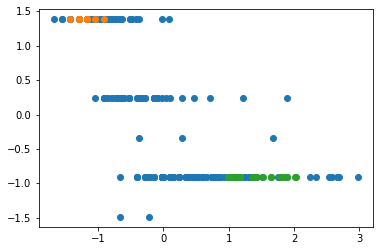

In [53]:
model = OPTICS(eps=0.5, min_samples=10)
yhat = model.fit_predict(norm_dataset)
# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = np.where(yhat == cluster)
	# create scatter of these samples
	plt.scatter(X[row_ix, 0],X[row_ix, 1])
# show the plot
plt.show()

In [57]:
yhat = yhat+1
dataset.insert(0,"Cluster3",yhat)
dataset.head(10)

,Cluster3,Cluster2,Cluster,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,1,1,2,14.0,8,350.0,165,4209.0,12,1972,1
1,1,0,0,31.9,4,89.0,71,1925.0,14,1980,2
2,1,1,2,17.0,8,302.0,140,3449.0,11,1971,1
3,1,1,2,15.0,8,400.0,150,3761.0,10,1971,1
4,1,0,0,30.5,4,98.0,63,2051.0,17,1978,1
5,1,1,2,23.0,8,350.0,125,3900.0,17,1980,1
6,2,1,2,13.0,8,351.0,158,4363.0,13,1974,1
7,1,1,2,14.0,8,440.0,215,4312.0,9,1971,1
8,1,0,1,25.4,5,183.0,77,3530.0,20,1980,2
9,3,0,0,37.7,4,89.0,62,2050.0,17,1982,0


In [58]:
i=0
for index,row in dataset.iterrows():
  if row[' brand']!=row['Cluster3']:
    i+=1
print(i)
print(dataset.shape[0])
print("Percent of similarity:", i/dataset.shape[0]*100 ,"%")

120
256
Percent of similarity: 46.875 %


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


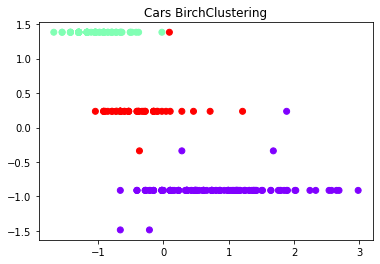

In [62]:
model = Birch(threshold=0.01, n_clusters=3)
model.fit_predict(norm_dataset)
plt.title("Cars BirchClustering")
plt.scatter(X[:,0], X[:,1], c=model.labels_, cmap='rainbow')
plt.show()

In [64]:
dataset.insert(0,"Cluster4",model.labels_)
dataset.head(10)

,Cluster4,Cluster3,Cluster2,Cluster,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,1,1,1,2,14.0,8,350.0,165,4209.0,12,1972,1
1,0,1,0,0,31.9,4,89.0,71,1925.0,14,1980,2
2,1,1,1,2,17.0,8,302.0,140,3449.0,11,1971,1
3,1,1,1,2,15.0,8,400.0,150,3761.0,10,1971,1
4,0,1,0,0,30.5,4,98.0,63,2051.0,17,1978,1
5,1,1,1,2,23.0,8,350.0,125,3900.0,17,1980,1
6,1,2,1,2,13.0,8,351.0,158,4363.0,13,1974,1
7,1,1,1,2,14.0,8,440.0,215,4312.0,9,1971,1
8,0,1,0,1,25.4,5,183.0,77,3530.0,20,1980,2
9,0,3,0,0,37.7,4,89.0,62,2050.0,17,1982,0


In [65]:
i=0
for index,row in dataset.iterrows():
  if row[' brand']!=row['Cluster4']:
    i+=1
print(i)
print(dataset.shape[0])
print("Percent of similarity:", i/dataset.shape[0]*100 ,"%")

131
256
Percent of similarity: 51.171875 %
